In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import random

In [2]:
# creating dataset
# rollno dob age gender marks grade attendance 
def generateDOB():
    start_date = datetime.date(2001, 1, 1)
    end_date   = datetime.date(2003, 12, 31)
    num_days   = (end_date - start_date).days
    rand_days   = random.randint(1, num_days)
    random_date = start_date + datetime.timedelta(days=rand_days)
    return random_date

def calculateAge(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

def generateGender():
    genders = ['M', 'F']
    return random.choice(genders)

def generateMarks():
    return random.randint(33, 85);

def calculateGrade(marks):
    if 90 < marks <= 100:
        return 'O'
    elif 80 < marks <= 90:
        return 'A'
    elif 70 < marks <=80:
        return 'B'
    elif 60 < marks <= 70:
        return 'C'
    elif 34 < marks <= 60:
        return 'D'
    else:
        return 'F'

def generateAttendance():
    return round(random.uniform(65.0, 90.0), 2)

data = {'rollno': [], 'dob': [], 'age': [], 'gender': [], 'marks': [], 'grade': [], 'attendance': []}
df = pd.DataFrame.from_dict(data);

for rollno in range(1, 4001):
    dob = generateDOB();
    age = calculateAge(dob)
    gender = generateGender()
    marks = generateMarks()
    grade = calculateGrade(marks)
    attendance = generateAttendance()
    row = [rollno, dob, age, gender, marks, grade, attendance];
    df.loc[len(df)]=row
    
df

,rollno,dob,age,gender,marks,grade,attendance
0,1.0,2003-02-06,20.0,M,61.0,C,80.49
1,2.0,2001-05-10,21.0,F,71.0,B,65.52
2,3.0,2003-12-02,19.0,M,83.0,A,65.78
3,4.0,2001-05-09,21.0,F,36.0,D,66.39
4,5.0,2001-02-06,22.0,M,85.0,A,75.97
...,...,...,...,...,...,...,...
3995,3996.0,2002-06-25,20.0,M,55.0,D,85.95
3996,3997.0,2001-05-23,21.0,M,42.0,D,78.76
3997,3998.0,2002-10-06,20.0,F,36.0,D,71.06
3998,3999.0,2001-08-12,21.0,F,85.0,A,67.49


In [11]:
# add 10 outliers: student with attendance < 10%, marks<10 and marks>98
def addAttendanceOutliers():
    for i in range(10):
        rollno = random.randint(0, 3999)
        new_attendance = random.uniform(0.0, 50.0)
        df.loc[df['rollno']==rollno, 'attendance'] = new_attendance
#         print(df.loc[df['rollno']==rollno])

addAttendanceOutliers()

def addMarksOutliers():
    for i in range(10):
        rollno = random.randint(0, 3999)
        new_marks1 = random.randint(0, 35)
        new_marks2 = random.randint(80, 100)
        new_marks = random.choice([new_marks1, new_marks2])
        df.loc[df['rollno']==rollno, 'marks'] = new_marks
#         print(df.loc[df['rollno']==rollno])

addMarksOutliers()

# add 10 inconsistencies: change grades
def addInconsistencies():
    grade = ['O', 'A', 'B', 'C', 'D', 'F']
    for i in range(10):
        rollno = random.randint(0, 3999)
        new_grade = random.choice(grade)
        df.loc[df['rollno']==rollno, 'grade'] = new_grade
#         print(df.loc[df['rollno']==rollno])

addInconsistencies()

#add 10 missing values:
def addMissingValuesMarks():
    for i in range(10):
        rollno = random.randint(0, 3999)
        df.loc[df['rollno']==rollno, 'marks'] = 1
        print(df.loc[df['rollno']==rollno])
        
addMissingValuesMarks()


      rollno         dob   age gender  marks grade  attendance
3953  3954.0  2002-10-23  20.0      F    1.0     A       67.43
     rollno         dob   age gender  marks grade  attendance
188   189.0  2002-12-07  20.0      F    1.0     A       74.31
     rollno         dob   age gender  marks grade  attendance
760   761.0  2003-12-02  19.0      F    1.0     C    1.837911
      rollno         dob   age gender  marks grade  attendance
1647  1648.0  2003-10-18  19.0      F    1.0     A        85.4
      rollno         dob   age gender  marks grade  attendance
2083  2084.0  2002-01-25  21.0      M    1.0     A       81.12
      rollno         dob   age gender  marks grade  attendance
2856  2857.0  2003-05-26  19.0      M    1.0     D       75.11
      rollno         dob   age gender  marks grade  attendance
2395  2396.0  2001-03-22  21.0      M    1.0     D       72.95
      rollno         dob   age gender  marks grade  attendance
2254  2255.0  2001-06-11  21.0      M    1.0     B       89

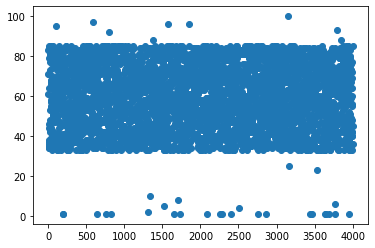

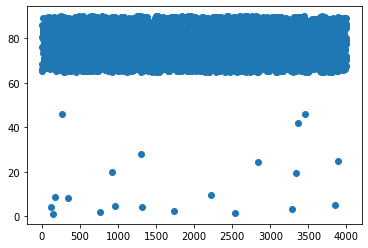

In [28]:
import matplotlib.pyplot as plt

plt.scatter(df['rollno'].tolist(), df['marks'].tolist())
plt.show()standard

plt.scatter(df['rollno'].tolist(), df['attendance'].tolist())
plt.show()

In [40]:
ndf = df.copy()
ndf

,rollno,dob,age,gender,marks,grade,attendance
0,1.0,2003-02-06,20.0,M,61.0,C,80.49
1,2.0,2001-05-10,21.0,F,71.0,B,65.52
2,3.0,2003-12-02,19.0,M,83.0,A,65.78
3,4.0,2001-05-09,21.0,F,36.0,D,66.39
4,5.0,2001-02-06,22.0,M,85.0,A,75.97
...,...,...,...,...,...,...,...
3995,3996.0,2002-06-25,20.0,M,55.0,D,85.95
3996,3997.0,2001-05-23,21.0,M,42.0,D,78.76
3997,3998.0,2002-10-06,20.0,F,36.0,A,71.06
3998,3999.0,2001-08-12,21.0,F,85.0,A,67.49


In [ ]:
# handle and correct inconsistencies
# use np.where()

# new_df = df.where(is_correct())

# for row in df:
#     if()

In [41]:
#  use mean imputation for missing values
mean_val = int(ndf['marks'].mean())
ndf['marks'].fillna(mean_val, inplace=True)
ndf['marks'].isnull().sum()

0

In [42]:
# use scatterplot based method for outliers

# Upper bound
upper = 85
upper_array= np.where(ndf['marks']>=upper)

# Lower bound
lower = 33
lower_array= np.where(ndf['marks']<=lower)

# Removing the outliers
ndf.drop(upper_array[0],inplace=True)
ndf.drop(lower_array[0],inplace=True)

ndf.shape

(3820, 7)

In [43]:
# apply data transformation
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

ncols = ['marks']

ndf[ncols] = scaler.fit_transform(ndf[ncols])

ndf

,rollno,dob,age,gender,marks,grade,attendance
0,1.0,2003-02-06,20.0,M,0.110993,C,80.49
1,2.0,2001-05-10,21.0,F,0.790795,B,65.52
2,3.0,2003-12-02,19.0,M,1.606557,A,65.78
3,4.0,2001-05-09,21.0,F,-1.588512,D,66.39
5,6.0,2001-09-02,21.0,M,-0.908710,D,68.43
...,...,...,...,...,...,...,...
3994,3995.0,2001-03-09,21.0,M,-1.316592,D,77.41
3995,3996.0,2002-06-25,20.0,M,-0.296888,D,85.95
3996,3997.0,2001-05-23,21.0,M,-1.180631,D,78.76
3997,3998.0,2002-10-06,20.0,F,-1.588512,A,71.06


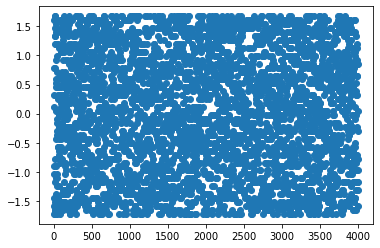

In [45]:
plt.scatter(ndf['rollno'].tolist(), ndf['marks'].tolist())
plt.show()
